In [ ]:
''' To find the RSI 
RSI (Relative Scale Index):The best practise used to  check if we can buy a stock or to sell one 
if RSI is < 30 the stock is oversold i.e a person can buy it
if RSI is > 70 the stock is overbought i.e a person can sell it '''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [ ]:
import pandas_datareader as web

In [ ]:
data=web.DataReader('FB',data_source='yahoo',start='2020-1-1',end='2021-1-1')

In [ ]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998
2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001
...,...,...,...,...,...,...
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999


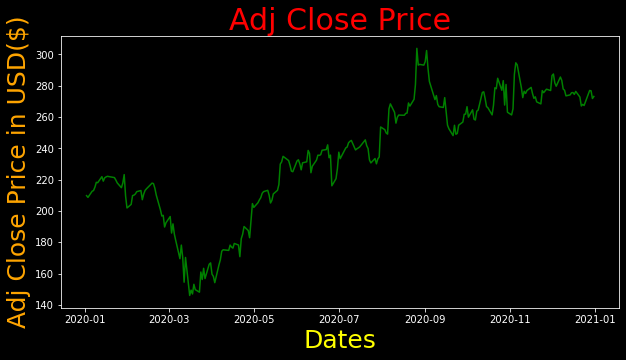

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.index,data['Adj Close'],color='green')
plt.title('Adj Close Price',color='red',size=30)
plt.xlabel('Dates',color='Yellow',size=25)
plt.ylabel('Adj Close Price in USD($)',size=25,color='orange')
plt.show()

In [ ]:
delta=data['Adj Close'].diff(1)

In [ ]:
delta

Date
2020-01-02         NaN
2020-01-03   -1.110001
2020-01-06    3.930008
2020-01-07    0.459991
2020-01-08    2.160004
                ...   
2020-12-24   -0.709991
2020-12-28    9.600006
2020-12-29   -0.220001
2020-12-30   -4.910004
2020-12-31    1.290009
Name: Adj Close, Length: 253, dtype: float64

In [ ]:
delta=delta.dropna()

In [ ]:
ups=delta.copy()
lows=delta.copy()

In [ ]:
ups[ups<0]=0
lows[lows>0]=0

In [ ]:
avg_gain=ups.rolling(window=14).mean()
avg_loss=abs(lows.rolling(window=14).mean())

In [ ]:
avg_loss

Date
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
                ...   
2020-12-24    1.659999
2020-12-28    1.659999
2020-12-29    1.520000
2020-12-30    1.479287
2020-12-31    1.422143
Name: Adj Close, Length: 252, dtype: float64

In [ ]:
RS=avg_gain/avg_loss

In [ ]:
RS

Date
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
                ...   
2020-12-24    0.470739
2020-12-28    0.630809
2020-12-29    0.688910
2020-12-30    0.707870
2020-12-31    0.801105
Name: Adj Close, Length: 252, dtype: float64

In [ ]:
RSI = 100 - (100/(1.0+ RS))

In [ ]:
RSI

Date
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
                ...    
2020-12-24    32.006975
2020-12-28    38.680755
2020-12-29    40.790213
2020-12-30    41.447535
2020-12-31    44.478542
Name: Adj Close, Length: 252, dtype: float64

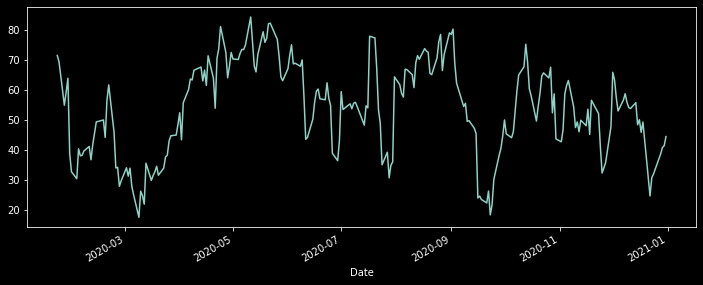

In [ ]:
plt.figure(figsize=(12,4.5))
RSI.plot()

In [ ]:
new=pd.DataFrame()
new['Adj Close']= data['Adj Close']
new['RSI'] = RSI

In [ ]:
new

,Adj Close,RSI
Date,,
2020-01-02,209.779999,NaN
2020-01-03,208.669998,NaN
2020-01-06,212.600006,NaN
2020-01-07,213.059998,NaN
2020-01-08,215.220001,NaN
...,...,...
2020-12-24,267.399994,32.006975
2020-12-28,277.000000,38.680755
2020-12-29,276.779999,40.790213


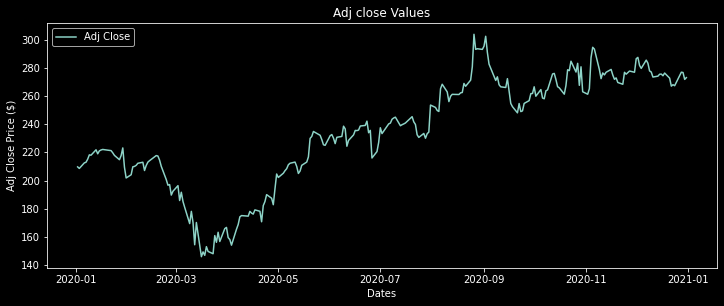

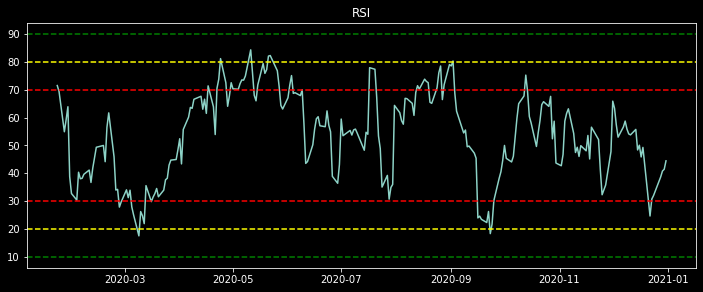

In [ ]:
plt.figure(figsize=(12,4.5))
plt.plot(new.index,new['Adj Close'])
plt.title('Adj close Values')
plt.legend(new.columns.values,loc='upper left')
plt.xlabel('Dates')
plt.ylabel('Adj Close Price ($)')
plt.show()
print()
plt.figure(figsize=(12,4.5))
plt.plot(new.index,new['RSI'])
plt.title('RSI')
plt.axhline(10,linestyle='--',color='green')

plt.axhline(20,linestyle='--',color='yellow')
plt.axhline(30,linestyle='--',color='red')
plt.axhline(80,linestyle='--',color='yellow')
plt.axhline(90,linestyle='--',color='green')
plt.axhline(70,linestyle='--',color='red')
plt.show()